In [27]:
# importing packages

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from plotnine import *

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import train_test_split 
from sklearn.decomposition import PCA

%matplotlib inline

### A. Build a Linear Regression Model to predict ```y``` from all the ```x``` variables (```X1``` to ```X50```)

In [28]:
url = 'https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/HW4_1.csv'
df = pd.read_csv(url)

df.head()


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X42,X43,X44,X45,X46,X47,X48,X49,X50,y
0,0.384149,1.111962,0.373605,0.917501,1.134492,0.960647,0.627464,0.958256,0.471226,0.642484,...,0.088335,0.345949,-0.368745,-0.445129,-0.010879,-0.271876,-0.394958,-0.146254,-0.476075,24.470958
1,0.840275,0.012389,0.970561,0.051327,0.708077,0.527206,0.696664,0.722517,1.380874,0.959594,...,0.563963,0.123787,0.042312,0.361144,-0.192868,0.213551,-0.507160,0.472163,0.346417,29.350043
2,-0.524459,0.171770,-0.352452,-0.832353,-0.427443,-0.295201,-0.692488,0.101357,-0.200059,-0.515774,...,-1.647765,-1.107207,-1.380130,-0.937277,0.007752,-1.425836,-0.724967,-1.823506,-1.507816,-75.143042
3,-0.651513,-1.076732,-0.689102,0.022812,-1.030788,-0.507673,-1.708206,-0.862988,-0.821164,-0.726695,...,1.686901,1.402889,0.464069,1.226353,0.655251,1.304203,1.128789,1.228063,0.905470,11.952432
4,-0.473348,0.064595,0.058449,0.401638,0.078103,-1.110774,0.230972,0.107108,0.130277,0.373338,...,1.068410,0.375697,1.329678,1.857105,0.891412,1.715978,1.707637,1.250494,1.241173,61.165560


In [29]:
# Linear Regression Model
predictors = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 
'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31', 'X32', 'X33',
 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41', 'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50']


X_train, X_test, y_train, y_test = train_test_split(df[predictors], df['y'], test_size = 0.1)

# z-scoring
z = StandardScaler()
X_train[predictors] = z.fit_transform(X_train[predictors])
X_test[predictors] = z.transform(X_test[predictors])

lr = LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)

# print out MSE and R2 values
print('The Mean Squared Error is: ', mean_squared_error(y_test, pred))
print('The R2 value is: ', r2_score(y_test, pred))

The Mean Squared Error is:  3.989428637032977
The R2 value is:  0.999062590652402


### B. Performance of Model (A)

The mean squared error (MSE) is a metric used to indicate how close a regression line is to a set of points. Essentially, it measures the amount of error in a model — in our case the Linear Regression model. Generally, the larger the MSE value, the larger the error while a smaller MSE indicates that the predicted value is close to the actual value. In our linear regression model, the MSE was approximately 3.99, indicating that our model was relatively accurate (since the "perfect" number is 0). The R2 value indicates how well the model explains the observed data. It is essentially a measurement of how close the data is fitted to the regression line. Our model had a R2 value of 0.99, indicating that 99% of the variablity observed in the target variable (y) is explained by the linear regression model. This high R2 value suggests that in our model, the line of best fit passes through may of the data points within the regression model.

In [30]:
features = df.columns[0:50]

pca = PCA()
pca.fit(X_train[predictors])

pcaDF = pd.DataFrame({'expl_var': pca.explained_variance_ratio_, 'pc': range(1,51), 
'cum_var':pca.explained_variance_ratio_.cumsum()})

pcaDF.head(20)

,expl_var,pc,cum_var
0,0.427452,1,0.427452
1,0.389338,2,0.816791
2,0.007931,3,0.824722
3,0.006501,4,0.831222
4,0.006167,5,0.837390
5,0.006028,6,0.843418
6,0.005825,7,0.849243
7,0.005635,8,0.854879
8,0.005500,9,0.860379
9,0.005405,10,0.865784


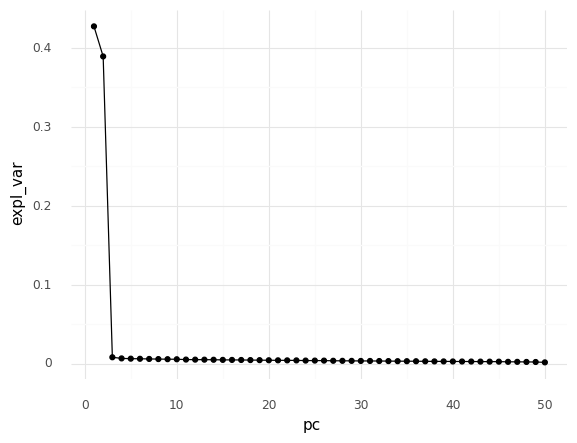

<ggplot: (136291973566)>

In [31]:
# scree plot
(ggplot(pcaDF, aes(x = 'pc', y = 'expl_var')) + geom_line() + geom_point() + theme_minimal())

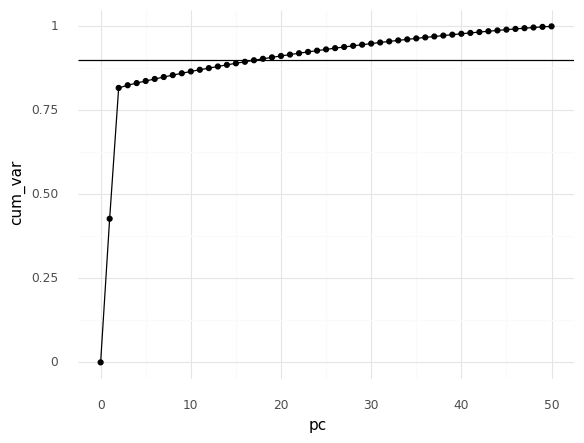

<ggplot: (136292091718)>

In [36]:
pcaDF = pcaDF.append({'expl_var': 0, 'pc': 0, 'cum_var': 0}, ignore_index = True)
(ggplot(pcaDF, aes(x = 'pc', y = 'cum_var')) + geom_line() + geom_point() + theme_minimal() + geom_hline(yintercept = 0.9))

### Evaluating Scree Plot

A scree plot is a graph that shows the eigenvalues of factors (priniple components) in a dataset. It is used to determine the optimal number of factors to retain in principal component analysis (PCA). It shows how much variance each principal component captures. In our scree plot, the graph seemed 'abnormal' in that there was no clear 'elbow' to use as our ideal number of principal components. The graph had a steep drop after 2 principal components. However, in the graph looking at 'cumulative variance' instead of 'explained variance', we see a similar trend. The cumulative variance dramatically increases in the first two principal components and then gradually increases. We wanted to evalaute the number of principal components needed to retain 90% of the original variance. After graphing the y-intercept (y = 0.9), I determined that 17 principal components would be sufficient to meet this threshold.

In [58]:
pcs = pca.transform(X_train)
train_17pc = pd.DataFrame(pcs[:, 0:17])

pcs = pca.transform(X_test)
test_17pc = pd.DataFrame(pcs[:, 0:17])

lr17 = LinearRegression()

lr17.fit(train_17pc, y_train)

# print out MSE and R2 values
print('Train Set')
print('The Mean Squared Error is: ', mean_squared_error(y_train, lr17.predict(train_17pc)))
print('The R2 value is: ', r2_score(y_train, lr17.predict(train_17pc)))
print('\n')
print('Test Set')
print('The Mean Squared Error is: ', mean_squared_error(y_test, lr17.predict(test_17pc)))
print('The R2 value is: ', r2_score(y_test, lr17.predict(test_17pc)))



Train Set
The Mean Squared Error is:  37.31849940463183
The R2 value is:  0.9910434712640389


Test Set
The Mean Squared Error is:  33.03970815316606
The R2 value is:  0.9922365496208697


### D. Performance Evaluation

When comparing the model created after dimensionality reduction via principal component analysis (PCA), I found that the model performed worse overall. When examining the mean squared error (MSE) values for both the train set and the test set, they were significantly higher at 33.32 and 33.04 respectively. PCA is a method of dimensionality reduction used to reduce the number of "features" of large datasets. It works to transform large sets of variables into smaller ones that still retain most of the information in the large datset. Although this may impact accuracy, it is sometimes favored due to its simplicity. Using PCA can help analyze data easier and allow for faster computations in machine learning algorithms, such as linear regression. When performing PCA, I had expected the MSE and R2 value to be slightly worse than that of the model in part A, where all features were used. This was reflected with the higher MSE scores and the lower R2 scores after PCA was performed.

Z-scoring is especially important in PCA because it evaluates the overall variance. If the variables are on different scales, one may contribute more to the variance due to the different scale. Z-scoring resolves this issue by standardizing all of the values in a dataset.

### E. Model Comparison

The model after PCA had a high MSE, indicating that the variance in the model was larger than the model created in part A. The R2 values however remained relatively similar with the original model (0.99). From these metrics, I cannot confidently say which model would be best used on this dataset and more metrics would have to be employed. However, I would hypothesize that using the principal components would be sufficient for this dataset. The main advantages of PCA is dimensionality reduction, which reduces the number of features for analysis. This makes evaluating data easier and is computationally more efficient in machine learning algorithms. However, this comes at the expense of accuracy but this may be preferred when dealing with large datasets. The relatively similar R2 values suggest that the line of best fit passes through may of the data points within the regression model. Overall, I expected the accuracy of the model after dimensionality reduction to be lower than that of the original model in part A. Thus, while additional metrics should be employed to determine which of the two is more ideal, this preliminary analysis suggests that using PCA may be beneficial.